In [ ]:
!pip install python-dateutil
# install the full version
!pip install pycaret

     |████████████████████████████████| 264 kB 5.1 MB/s 
     |████████████████████████████████| 271 kB 44.4 MB/s 
     |████████████████████████████████| 1.3 MB 43.2 MB/s 
     |████████████████████████████████| 2.0 MB 38.0 MB/s 
     |████████████████████████████████| 111 kB 54.5 MB/s 
     |████████████████████████████████| 167 kB 54.5 MB/s 
     |████████████████████████████████| 6.8 MB 61.3 MB/s 
     |████████████████████████████████| 14.6 MB 121 kB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 1.7 MB 54.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 54.6 MB/s 
     |████████████████████████████████| 675 kB 42.0 MB/s 
     |████████████████████████████████| 10.1 MB 36.5 MB/s 
     |█████████████████

In [ ]:
from google.colab import drive
from dateutil import relativedelta
import datetime

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
#aimspd = pd.read_csv('/content/gdrive/MyDrive/CAH-Hackathon/AMSh.csv')
#aimspd = pd.read_excel('/content/gdrive/MyDrive/CAH-Hackathon/missigua.xlsx',sheet_name="Sheet1")
aimspd = pd.read_excel('/content/gdrive/MyDrive/CAH-Hackathon/missigua.xlsx',sheet_name="Sheet2")

In [ ]:
aimspd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genyear     796 non-null    int64 
 1   genmonth    796 non-null    int64 
 2   genweek     796 non-null    int64 
 3   genday      796 non-null    int64 
 4   genweekday  796 non-null    object
 5   genhour     796 non-null    int64 
 6   cnt         796 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 43.7+ KB


In [ ]:
aimspd.describe()

,genyear,genmonth,genweek,genday,genhour,cnt
count,796.0,796.000000,796.000000,796.000000,796.000000,796.000000
mean,2021.0,8.356784,35.182161,14.765075,11.961055,47.316583
std,0.0,0.497381,1.819042,8.327953,6.757041,83.828203
min,2021.0,7.000000,31.000000,1.000000,0.000000,1.000000
25%,2021.0,8.000000,34.000000,8.000000,7.000000,10.000000
50%,2021.0,8.000000,35.000000,13.500000,12.000000,26.000000
75%,2021.0,9.000000,37.000000,22.000000,18.000000,52.000000
max,2021.0,9.000000,38.000000,31.000000,23.000000,916.000000


In [ ]:
 aimspd['cdate']=pd.to_datetime(dict(year=aimspd.genyear, 
                                     month=aimspd.genmonth, 
                                     day=aimspd.genday,
                                     hour=aimspd.genhour))

In [ ]:
aimspd.head()

,genyear,genmonth,genweek,genday,genweekday,genhour,cnt,cdate
0,2021,7,31,28,Wednesday,17,2,2021-07-28 17:00:00
1,2021,7,31,28,Wednesday,18,2,2021-07-28 18:00:00
2,2021,7,31,28,Wednesday,20,3,2021-07-28 20:00:00
3,2021,7,31,28,Wednesday,22,7,2021-07-28 22:00:00
4,2021,7,31,29,Thursday,12,9,2021-07-29 12:00:00


In [ ]:
fil_date = aimspd.cdate.max() + relativedelta.relativedelta(months=-2)

In [ ]:
fil_date = datetime.datetime(2021,8,7)

In [ ]:
aimsn = aimspd[ aimspd.cdate > fil_date]

In [ ]:
df = aimsn.groupby([aimspd['cdate'].dt.date])['cnt'].sum()
df.describe()

count      41.000000
mean      904.097561
std       421.638934
min         7.000000
25%       831.000000
50%       981.000000
75%      1100.000000
max      1838.000000
Name: cnt, dtype: float64

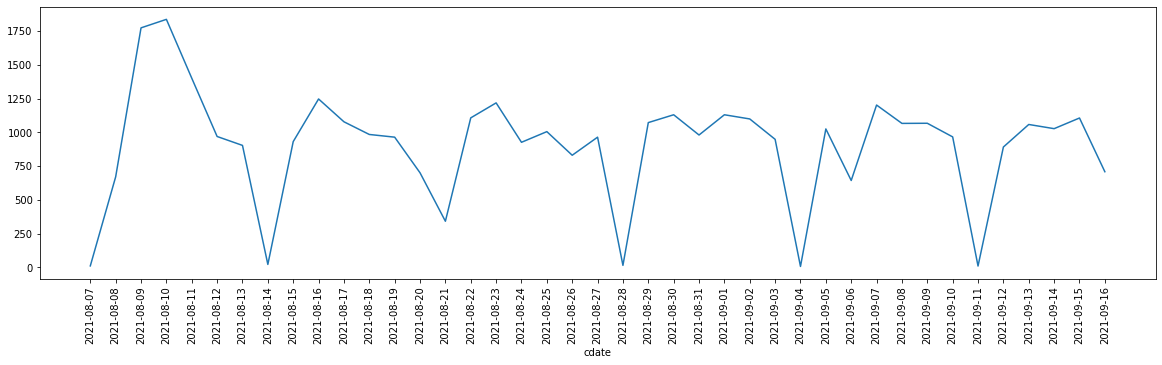

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


plt.xticks(rotation='vertical')
df = aimsn.groupby([aimspd['cdate'].dt.date])['cnt'].sum()

df.plot(rot=90,figsize=(20,5),xticks = df.index)

In [ ]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

hdr = pd.date_range(start=df.index.min(), end=df.index.max())
hdf = pd.DataFrame()
hdf['Date'] = hdr

cal = calendar()
holidays = cal.holidays(start=hdr.min(), end=hdr.max())

hdf['Holiday'] = hdf['Date'].isin(holidays)
print (hdf[hdf.Holiday])

         Date  Holiday
30 2021-09-06     True


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

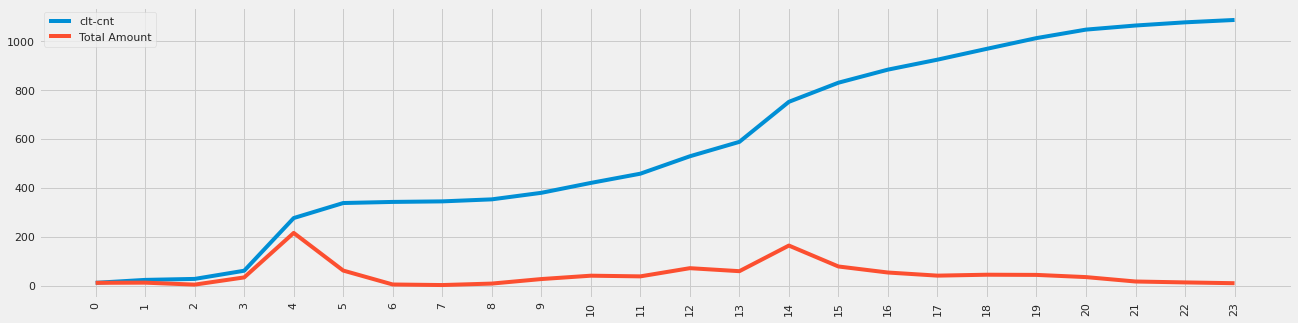

In [ ]:
mondf = aimsn[aimsn.genweekday == 'Friday']
mondf['mon-day'] = mondf['genmonth'].map(str) + '-' + mondf['genday'].map(str) 
df = mondf.groupby(mondf['genhour'])['cnt'].mean().reset_index(name ='Total Amount')
df['clt-cnt'] = df['Total Amount'].cumsum()

df.plot(y=["clt-cnt", "Total Amount"],rot=90,figsize=(20,5),xticks = df.index)
df.to_csv('cumsum.txt')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


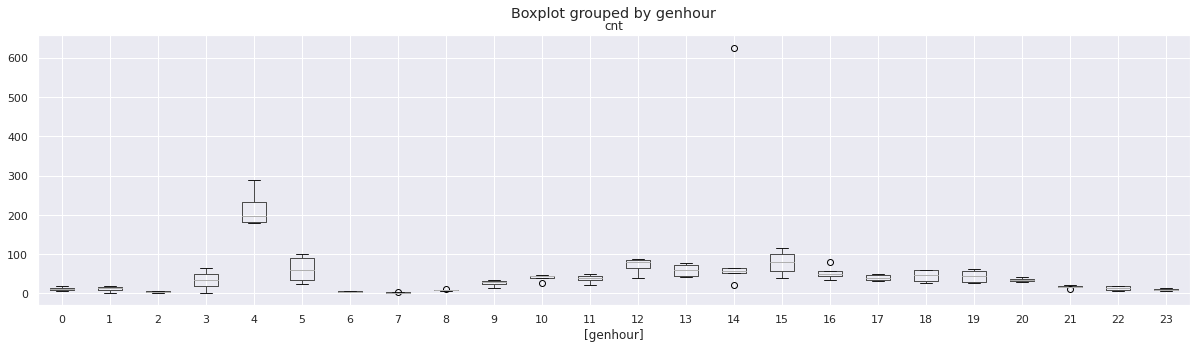

In [ ]:
mondf.boxplot(column=['cnt'],by=['genhour'],figsize=(20,5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


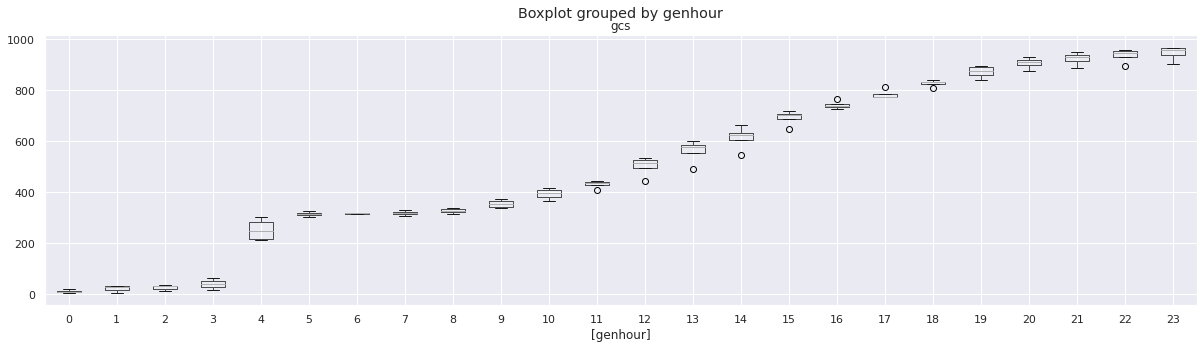

In [ ]:
mondf['gcs'] = mondf[[ 'mon-day','cnt']].groupby('mon-day').cumsum()
mondf.boxplot(column=['gcs'],by=['genhour'],figsize=(20,5))

In [ ]:
res = mondf.pivot_table(index='genhour', columns='mon-day', values='cnt')
res.to_csv('res.txt')

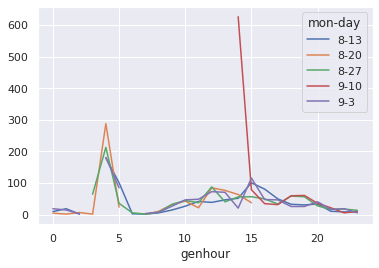

In [ ]:
res.plot()

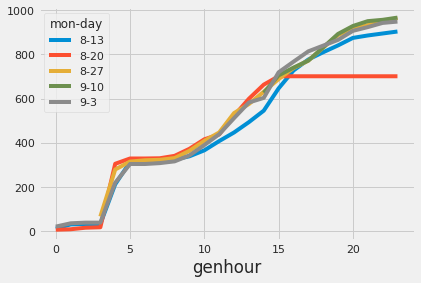

In [ ]:
cs_df = res.cumsum()
cs_df.ffill(inplace=True )
cs_df.to_csv('cum-res.txt')
cs_df.plot()

#PYCaret Anomaly detection

In [ ]:
#https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe
#https://www.google.com/search?q=timeseries+prediction+hourly&oq=timeseries+prediction+hourly&aqs=chrome..69i57j33i10i160.9818j0j4&sourceid=chrome&ie=UTF-8
#https://towardsdatascience.com/part-2-time-series-analysis-predicting-hourly-energy-consumption-of-san-diego-ii-f09665796c9
#https://www.youtube.com/watch?v=xaIA83x5Icg
#https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
#https://curiousily.com/posts/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python/

In [ ]:
# create moving-averages

data = aimsn.copy(deep=True)
data.drop(['genyear',	'genmonth',	'genweek'	,'genday'	,'genhour'], axis=1, inplace=True)

data.rename(columns = {'cdate':'timestamp','cnt':'value' }, inplace = True)
data = data.sort_values(by="timestamp")


# create moving-averages
data['MA48'] = data['value'].rolling(48).mean()
data['MA336'] = data['value'].rolling(336).mean()
# plot 
import plotly.express as px
fig = px.line(data, x="timestamp", y="value", title='NYC Taxi Trips', template = 'plotly_dark')
fig.show()

In [ ]:
# drop moving-average columns
data.drop(['MA48', 'MA336'], axis=1, inplace=True)
# set timestamp to index
data.set_index('timestamp', drop=True, inplace=True)
# resample timeseries to hourly 
data = data.resample('H').sum()
# creature features from date
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
data['hour'] = [i.hour for i in data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]
data.head()

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday
timestamp,,,,,,,
2021-08-07 01:00:00,5,7,Saturday,219,31,1,6
2021-08-07 02:00:00,6,7,Saturday,219,31,2,6
2021-08-07 03:00:00,0,7,Saturday,219,31,3,6
2021-08-07 04:00:00,0,7,Saturday,219,31,4,6
2021-08-07 05:00:00,0,7,Saturday,219,31,5,6


In [ ]:
# init setup
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(975, 7)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(975, 25)"
9,CPU Jobs,-1


In [ ]:
# check list of available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
# train model
iforest = create_model('iforest', fraction = 0.1)
iforest_results = assign_model(iforest)
iforest_results.head()

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2021-08-07 01:00:00,5,7,Saturday,219,31,1,6,1,0.038498
2021-08-07 02:00:00,6,7,Saturday,219,31,2,6,1,0.037449
2021-08-07 03:00:00,0,7,Saturday,219,31,3,6,1,0.007939
2021-08-07 04:00:00,0,7,Saturday,219,31,4,6,1,0.002787
2021-08-07 05:00:00,0,7,Saturday,219,31,5,6,1,0.002084


In [ ]:
# check anomalies
iforest_results[iforest_results['Anomaly'] == 1].head()

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2021-08-07 01:00:00,5,7,Saturday,219,31,1,6,1,0.038498
2021-08-07 02:00:00,6,7,Saturday,219,31,2,6,1,0.037449
2021-08-07 03:00:00,0,7,Saturday,219,31,3,6,1,0.007939
2021-08-07 04:00:00,0,7,Saturday,219,31,4,6,1,0.002787
2021-08-07 05:00:00,0,7,Saturday,219,31,5,6,1,0.002084


In [ ]:
import plotly.graph_objects as go
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=iforest_results.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i]['value'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))
        
fig.show()

#Test for cumilative sum

In [ ]:
import pandas as pd
data = {"Date_Time": ["2018-08-14 02:00:00", "2018-08-14 01:00:00", "2018-08-14 00:00:00", "2018-08-13 23:00:00", "2018-08-13 22:00:00", "2018-08-13 21:00:00", "2018-08-13 20:00:00"], 
    "Date": ["2018-08-14", "2018-08-14", "2018-08-14", "2018-08-13", "2018-08-13", "2018-08-13", "2018-08-13"], 
    "Duration":[3, 0, 0, 10, 2, 20, 1], 
    "value":[4, 3, 2, 1, 0, 23, 22],
    "Remark":["e", "o", "k", "x", "c", "z", "a"]
    }
df = pd.DataFrame.from_dict(data)
df


,Date_Time,Date,Duration,value,Remark
0,2018-08-14 02:00:00,2018-08-14,3,4,e
1,2018-08-14 01:00:00,2018-08-14,0,3,o
2,2018-08-14 00:00:00,2018-08-14,0,2,k
3,2018-08-13 23:00:00,2018-08-13,10,1,x
4,2018-08-13 22:00:00,2018-08-13,2,0,c
5,2018-08-13 21:00:00,2018-08-13,20,23,z
6,2018-08-13 20:00:00,2018-08-13,1,22,a


In [ ]:
two_hours = pd.Timedelta(hours=2)
#dates = (df["Date_Time"]).dt.date
df["cum_sum"] = df["Duration"].iloc[::-1].groupby(df["Date"]).cumsum()
print (df)

             Date_Time        Date  Duration  value Remark  cum_sum
0  2018-08-14 02:00:00  2018-08-14         3      4      e        3
1  2018-08-14 01:00:00  2018-08-14         0      3      o        0
2  2018-08-14 00:00:00  2018-08-14         0      2      k        0
3  2018-08-13 23:00:00  2018-08-13        10      1      x       33
4  2018-08-13 22:00:00  2018-08-13         2      0      c       23
5  2018-08-13 21:00:00  2018-08-13        20     23      z       21
6  2018-08-13 20:00:00  2018-08-13         1     22      a        1


#Set for Cumilative sum

In [ ]:
#https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

In [ ]:
data = aimsn.copy(deep=True)
data.drop(['genyear',	'genmonth',	'genweek'	,'genday'	,'genhour'], axis=1, inplace=True)

data.sort_values(by=['cdate'], inplace=True, ascending=False)

data['cdate1'] = data['cdate'].dt.date
data["cum_sum"] = data["cnt"].iloc[::-1].groupby(data["cdate1"]).cumsum()

data.rename(columns = {'cdate':'Datetime','cum_sum':'PJME_MW' }, inplace = True)
data.drop(['genweekday',	'cnt',	'cdate1'], axis=1, inplace=True)
pjme = data.sort_values(by="Datetime")
pjme.set_index('Datetime', inplace = True)
pjme.head()

,PJME_MW
Datetime,
2021-08-07 01:00:00,5
2021-08-07 02:00:00,11
2021-08-08 03:00:00,325
2021-08-08 04:00:00,499
2021-08-08 05:00:00,547


In [ ]:
aimsn.head()

,genyear,genmonth,genweek,genday,genweekday,genhour,cnt,cdate
41,2021,8,32,7,Saturday,1,5,2021-08-07 01:00:00
42,2021,8,32,7,Saturday,2,6,2021-08-07 02:00:00
43,2021,8,33,8,Sunday,3,325,2021-08-08 03:00:00
44,2021,8,33,8,Sunday,4,174,2021-08-08 04:00:00
45,2021,8,33,8,Sunday,5,48,2021-08-08 05:00:00


In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(pjme, label='PJME_MW')

features_and_target = pd.concat([X, y], axis=1)

In [ ]:
# See our features and target
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2021-08-07 01:00:00,1,5,3,8,2021,219,7,31,5
2021-08-07 02:00:00,2,5,3,8,2021,219,7,31,11
2021-08-08 03:00:00,3,6,3,8,2021,220,8,31,325
2021-08-08 04:00:00,4,6,3,8,2021,220,8,31,499
2021-08-08 05:00:00,5,6,3,8,2021,220,8,31,547


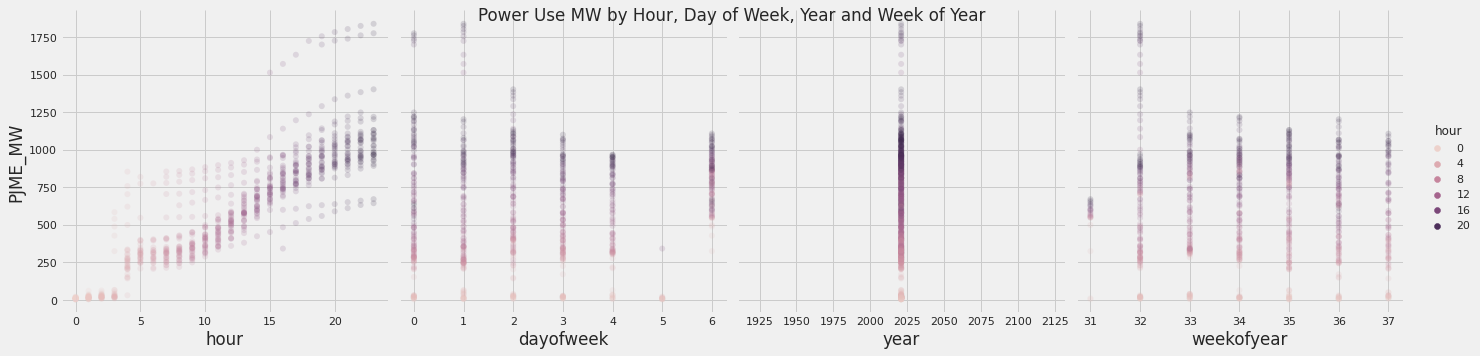

In [ ]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='PJME_MW',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()

In [ ]:
split_date = '04-Sep-2021'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

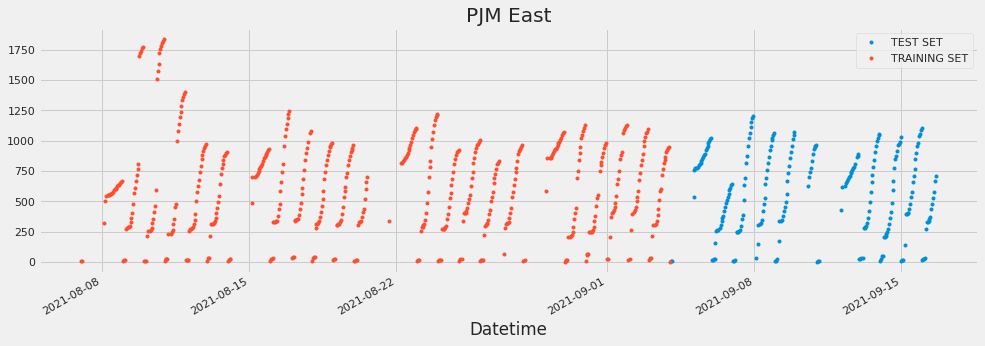

In [ ]:
# Plot train and test so you can see where we have split
pjme_test \
    .rename(columns={'PJME_MW': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='.')
plt.show()

In [ ]:
# Format data for prophet model using ds and y
pjme_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'PJME_MW':'y'}).head()

,ds,y
0,2021-08-07 01:00:00,5
1,2021-08-07 02:00:00,11
2,2021-08-08 03:00:00,325
3,2021-08-08 04:00:00,499
4,2021-08-08 05:00:00,547


In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(pjme_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'PJME_MW':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# Predict on training set with model
pjme_test_fcst = model.predict(df=pjme_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

In [ ]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-04 01:00:00,597.108643,-222.116946,266.422174,597.108643,597.108643,-565.491957,-565.491957,-565.491957,-559.540999,-559.540999,-559.540999,-5.950959,-5.950959,-5.950959,0.0,0.0,0.0,31.616685
1,2021-09-04 02:00:00,597.063820,-295.209795,187.345563,597.063820,597.063820,-636.747753,-636.747753,-636.747753,-647.655120,-647.655120,-647.655120,10.907367,10.907367,10.907367,0.0,0.0,0.0,-39.683933
2,2021-09-05 03:00:00,595.943252,68.802095,539.425370,595.831750,596.064470,-288.671243,-288.671243,-288.671243,-515.223792,-515.223792,-515.223792,226.552549,226.552549,226.552549,0.0,0.0,0.0,307.272009
3,2021-09-05 04:00:00,595.898429,240.144325,747.058069,595.778290,596.031153,-93.946572,-93.946572,-93.946572,-312.197118,-312.197118,-312.197118,218.250546,218.250546,218.250546,0.0,0.0,0.0,501.951857
4,2021-09-05 05:00:00,595.853606,376.902874,845.746039,595.725214,595.994975,19.557375,19.557375,19.557375,-189.148796,-189.148796,-189.148796,208.706171,208.706171,208.706171,0.0,0.0,0.0,615.410982


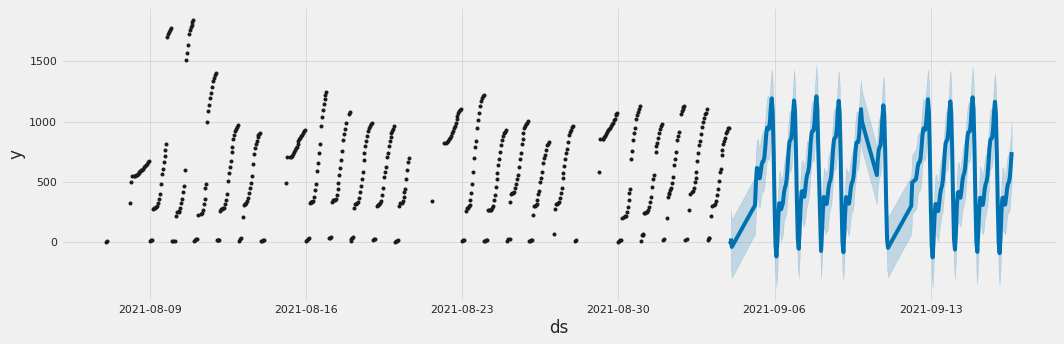

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

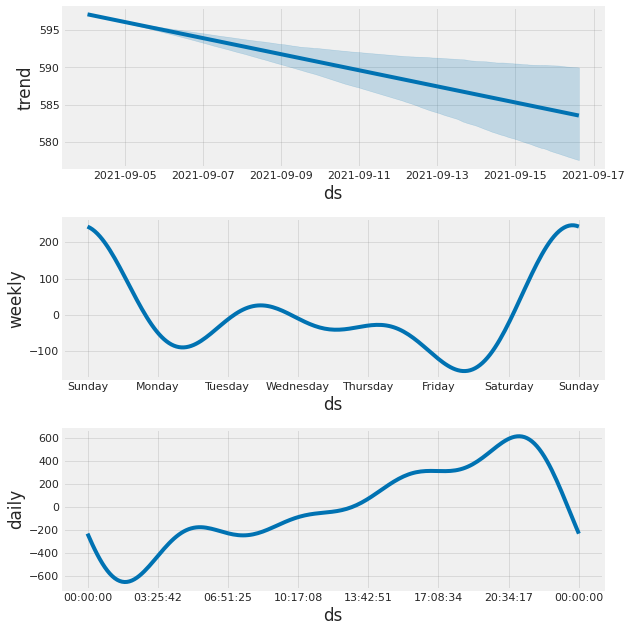

In [ ]:
# Plot the components of the model
fig = model.plot_components(pjme_test_fcst)

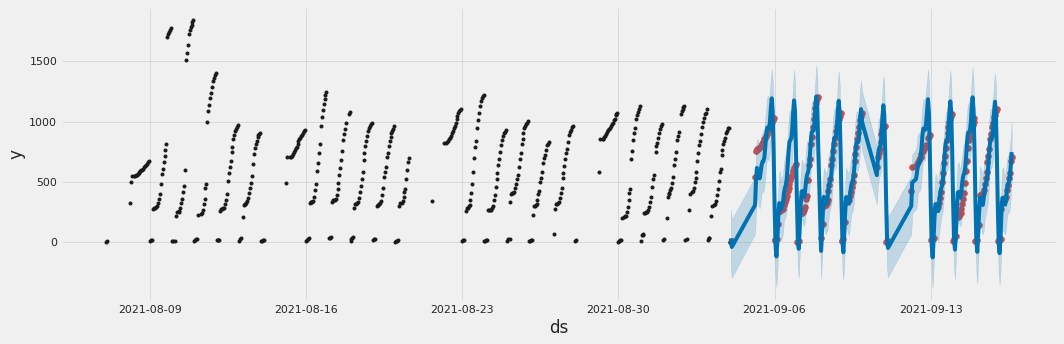

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

In [ ]:
pjme_test_fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
221,2021-09-16 11:00:00,583.751471,249.314964,719.330125,577.886277,590.068334,-101.860255,-101.860255,-101.860255,-60.512230,-60.512230,-60.512230,-41.348025,-41.348025,-41.348025,0.0,0.0,0.0,481.891216
222,2021-09-16 12:00:00,583.706649,243.214481,729.208620,577.815012,590.051158,-86.017823,-86.017823,-86.017823,-40.526673,-40.526673,-40.526673,-45.491150,-45.491150,-45.491150,0.0,0.0,0.0,497.688825
223,2021-09-16 13:00:00,583.661826,283.060166,791.018978,577.747335,590.041727,-44.934713,-44.934713,-44.934713,5.215674,5.215674,5.215674,-50.150386,-50.150386,-50.150386,0.0,0.0,0.0,538.727113
224,2021-09-16 14:00:00,583.617003,382.556988,863.489278,577.681805,590.023605,49.497571,49.497571,49.497571,104.794304,104.794304,104.794304,-55.296733,-55.296733,-55.296733,0.0,0.0,0.0,633.114574
225,2021-09-16 15:00:00,583.572180,504.399682,1000.748365,577.616276,590.004673,162.863145,162.863145,162.863145,223.755068,223.755068,223.755068,-60.891923,-60.891923,-60.891923,0.0,0.0,0.0,746.435326


In [ ]:
future = model.make_future_dataframe(freq='H',periods=1)
forecasts = model.predict(future)
forecasts

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-07 01:00:00,613.290031,-195.369305,276.700110,613.290031,613.290031,-565.491957,-565.491957,-565.491957,-559.540999,-559.540999,-559.540999,-5.950959,-5.950959,-5.950959,0.0,0.0,0.0,47.798074
1,2021-08-07 02:00:00,613.389629,-273.389780,237.234909,613.389629,613.389629,-636.747753,-636.747753,-636.747753,-647.655120,-647.655120,-647.655120,10.907367,10.907367,10.907367,0.0,0.0,0.0,-23.358124
2,2021-08-08 03:00:00,615.879586,95.687372,578.286793,615.879586,615.879586,-288.671243,-288.671243,-288.671243,-515.223792,-515.223792,-515.223792,226.552549,226.552549,226.552549,0.0,0.0,0.0,327.208343
3,2021-08-08 04:00:00,615.979184,283.831300,768.764537,615.979184,615.979184,-93.946572,-93.946572,-93.946572,-312.197118,-312.197118,-312.197118,218.250546,218.250546,218.250546,0.0,0.0,0.0,522.032611
4,2021-08-08 05:00:00,616.078782,385.624071,899.038574,616.078782,616.078782,19.557375,19.557375,19.557375,-189.148796,-189.148796,-189.148796,208.706171,208.706171,208.706171,0.0,0.0,0.0,635.636157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2021-09-03 21:00:00,597.287933,894.153476,1393.500313,597.287933,597.287933,545.342094,545.342094,545.342094,612.916588,612.916588,612.916588,-67.574495,-67.574495,-67.574495,0.0,0.0,0.0,1142.630027
526,2021-09-03 22:00:00,597.243111,810.908238,1288.376343,597.243111,597.243111,463.024599,463.024599,463.024599,516.288932,516.288932,516.288932,-53.264333,-53.264333,-53.264333,0.0,0.0,0.0,1060.267710
527,2021-09-03 23:00:00,597.198288,515.444294,1004.259334,597.198288,597.198288,157.473644,157.473644,157.473644,195.626820,195.626820,195.626820,-38.153176,-38.153176,-38.153176,0.0,0.0,0.0,754.671932
528,2021-09-04 00:00:00,597.153465,103.337366,582.746659,597.153465,597.153465,-253.409140,-253.409140,-253.409140,-231.064572,-231.064572,-231.064572,-22.344568,-22.344568,-22.344568,0.0,0.0,0.0,343.744325


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecasts)

In [ ]:
#https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
future = model.make_future_dataframe(freq='H',periods=1,include_history=False)
forecasts = model.predict(future)
forecasts

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-04 01:00:00,597.108643,-221.390705,256.403933,597.108643,597.108643,-565.491957,-565.491957,-565.491957,-559.540999,-559.540999,-559.540999,-5.950959,-5.950959,-5.950959,0.0,0.0,0.0,31.616685


In [ ]:
future = []
for i in range(1, 24):
	date = '2021-09-22 %02d:00:00' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
future

,ds
0,2021-09-22 01:00:00
1,2021-09-22 02:00:00
2,2021-09-22 03:00:00
3,2021-09-22 04:00:00
4,2021-09-22 05:00:00
5,2021-09-22 06:00:00
6,2021-09-22 07:00:00
7,2021-09-22 08:00:00
8,2021-09-22 09:00:00
9,2021-09-22 10:00:00


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-22 01:00:00,577.745226,-233.684496,247.882788,567.553119,587.825706,-573.383388,-573.383388,-573.383388,-559.540999,-559.540999,-559.540999,-13.842389,-13.842389,-13.842389,0.0,0.0,0.0,4.361839
1,2021-09-22 02:00:00,577.700404,-341.807575,170.250760,567.452663,587.811524,-665.405782,-665.405782,-665.405782,-647.655120,-647.655120,-647.655120,-17.750662,-17.750662,-17.750662,0.0,0.0,0.0,-87.705378
2,2021-09-22 03:00:00,577.655581,-202.210459,288.298971,567.352207,587.796055,-536.695421,-536.695421,-536.695421,-515.223792,-515.223792,-515.223792,-21.471629,-21.471629,-21.471629,0.0,0.0,0.0,40.960160
3,2021-09-22 04:00:00,577.610758,3.578971,492.507166,567.285389,587.783767,-337.152495,-337.152495,-337.152495,-312.197118,-312.197118,-312.197118,-24.955377,-24.955377,-24.955377,0.0,0.0,0.0,240.458263
4,2021-09-22 05:00:00,577.565936,128.120883,615.257744,567.245360,587.783951,-217.306509,-217.306509,-217.306509,-189.148796,-189.148796,-189.148796,-28.157714,-28.157714,-28.157714,0.0,0.0,0.0,360.259426
5,2021-09-22 06:00:00,577.521113,104.930797,608.703301,567.173207,587.783284,-217.790288,-217.790288,-217.790288,-186.749483,-186.749483,-186.749483,-31.040805,-31.040805,-31.040805,0.0,0.0,0.0,359.730825
6,2021-09-22 07:00:00,577.476290,50.641004,536.798884,567.078776,587.782617,-267.698396,-267.698396,-267.698396,-234.124671,-234.124671,-234.124671,-33.573725,-33.573725,-33.573725,0.0,0.0,0.0,309.777894
7,2021-09-22 08:00:00,577.431467,63.528852,540.703339,566.984677,587.781950,-276.028995,-276.028995,-276.028995,-240.296108,-240.296108,-240.296108,-35.732887,-35.732887,-35.732887,0.0,0.0,0.0,301.402473
8,2021-09-22 09:00:00,577.386645,96.978811,619.096777,566.913201,587.769157,-219.071694,-219.071694,-219.071694,-181.569323,-181.569323,-181.569323,-37.502371,-37.502371,-37.502371,0.0,0.0,0.0,358.314950
9,2021-09-22 10:00:00,577.341822,176.080121,674.074389,566.841724,587.763504,-144.014948,-144.014948,-144.014948,-105.140819,-105.140819,-105.140819,-38.874130,-38.874130,-38.874130,0.0,0.0,0.0,433.326873


In [ ]:
# Filter data between two dates
forecast = forecast.loc[(forecast['ds'] >= '2021-09-22')]
forecast[['ds','yhat_lower','yhat','yhat_upper']]

,ds,yhat_lower,yhat,yhat_upper
0,2021-09-22 01:00:00,-233.684496,4.361839,247.882788
1,2021-09-22 02:00:00,-341.807575,-87.705378,170.250760
2,2021-09-22 03:00:00,-202.210459,40.960160,288.298971
3,2021-09-22 04:00:00,3.578971,240.458263,492.507166
4,2021-09-22 05:00:00,128.120883,360.259426,615.257744
5,2021-09-22 06:00:00,104.930797,359.730825,608.703301
6,2021-09-22 07:00:00,50.641004,309.777894,536.798884
7,2021-09-22 08:00:00,63.528852,301.402473,540.703339
8,2021-09-22 09:00:00,96.978811,358.314950,619.096777
9,2021-09-22 10:00:00,176.080121,433.326873,674.074389


In [ ]:
plot_plotly(model, forecast)

In [ ]:
import pickle
with open('model.pckl', 'wb') as fout:
    pickle.dump(model, fout)

with open('model.pckl', 'rb') as fin:
    model = pickle.load(fin)

In [ ]:
from datetime import datetime
from datetime import timedelta
# Given timestamp in string
time_str = '24/7/2021 11'
date_format_str = '%d/%m/%Y %H'
# create datetime object from timestamp string
given_time = datetime.strptime(time_str, date_format_str)
print('Given Time: ', given_time)
n = 2
# Add 2 hours to datetime object
final_time = given_time + timedelta(hours=n)
print('Final Time (2 hours after given time ): ', final_time)
# Convert datetime object to string in specific format 
final_time_str = final_time.strftime('%d/%m/%Y %H:%M:%S.%f')
print('Final Time as string object: ', final_time_str)

Given Time:  2021-07-24 11:00:00
Final Time (2 hours after given time ):  2021-07-24 13:00:00
Final Time as string object:  24/07/2021 13:00:00.000000


In [ ]:
date = '2021-09-22 %02d:00:00' % i

In [ ]:
date

'2021-09-22 23:00:00'